# K-means

In [1]:
import numpy as np
from PIL import Image
import time
from scipy.spatial import distance
import matplotlib.pyplot as plt
from numpy.random import choice
import numpy.matlib

In [ ]:
def k_means(vector,initial_centroids):
    m = len(vector[0])
    k = np.size(initial_centroids,0)
    
    #initalize centroids and labels
    centroids = initial_centroids
    previous_centroids = np.zeros(centroids.shape)
    labels = np.zeros((m,1))
    
    iterations = 0
    error = np.linalg.norm(centroids - previous_centroids, 2)

    #continue until convergence
    while (error !=0):
        labels = closest_centroids(vector, centroids, k)
        centroids = update_centroids(vector, labels, k)
        error = np.linalg.norm(centroids - previous_centroids, 2)
        previous_centroids = centroids

        iterations += 1
        
    return centroids, labels, iterations

In [ ]:
#find the closest centroid
def closest_centroids(X, c, K):
    m, n = X.shape
    idx = np.zeros((m,1))
    arr = np.empty((m,1))
    
    for i in range(0,K):
        a = distance.cdist(X.reshape(-1,3),c[i].reshape(-1,3), 'sqeuclidean')
        arr = np.append(arr, a, axis=1)
    arr = np.delete(arr,0,axis=1)
    labels = np.argmin(arr, axis=1)
    return labels

In [ ]:
#update centroid as mean of cluster
def update_centroids(X,idx,K):
    n = np.size(X,1)
    centroids = np.zeros((K,n))

    for i in range(0,K):
        points = X[idx == i]
        centroids[i] = np.mean(points, axis=0)

    return centroids

In [ ]:
def k_means_main(image, K, ret = False):
    
    plt.imshow(image) 
    plt.show()
    
    start_time = time.time()

    #flatten to 2D matrix
    X = image.reshape((-1,3))
    
    #initialize centroids
    samples = choice(len(X), size=K, replace=False)
    init_centroids = X[samples, :]

    #k-means
    centroids,idx,iterations = k_means(X,init_centroids)
    idx = closest_centroids(X,centroids, K)

    #assigning each pixel to its corresponding centroid 
    X_recovered = centroids[idx]
    
    #getting back the 3d matrix
    X_recovered = X_recovered.reshape((image.shape))

    #plot the new image
    plt.imshow(X_recovered.astype(np.uint8)) 
    plt.show()
    
    if ret == True:
        return 'Number of iterations: {}. Time until convergence: {} seconds'.format(
            iterations, round((time.time() - start_time), 2)),idx, centroids
    else: 
        return 'Number of iterations: {}. Time until convergence: {} seconds'.format(
            iterations, round((time.time() - start_time), 2))

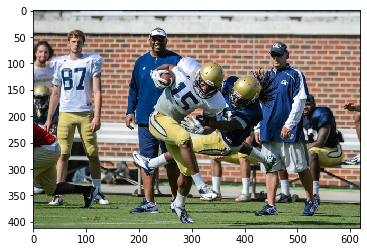

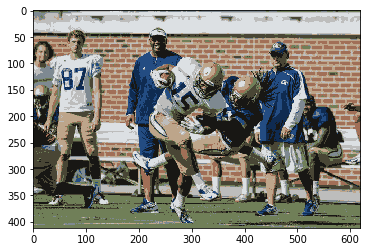

('Number of iterations: 86. Time until convergence: 9.11 seconds',
 array([1, 1, 1, ..., 6, 6, 6]),
 array([[126.31831813, 137.86716008, 145.93345243],
        [ 73.60510254,  70.56673664,  53.12372033],
        [189.54527381, 165.93962518, 138.46355583],
        [ 35.41665001,  76.20617629, 130.32570458],
        [ 24.49419827,  23.73360974,  20.10661945],
        [161.11382596, 111.37148618,  87.54003084],
        [112.7972092 , 127.75476461,  88.55943629],
        [220.14274951, 224.95683295, 227.8990048 ],
        [ 15.64970606,  43.18001216,  81.12436651],
        [189.65515054, 189.64630825, 188.2974667 ]]))

In [201]:
image = Image.open('HW1_Data/football.bmp')
image = np.array(image)

k_means_main(image, 10, True)

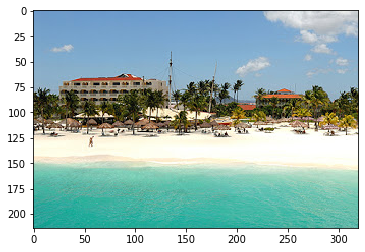

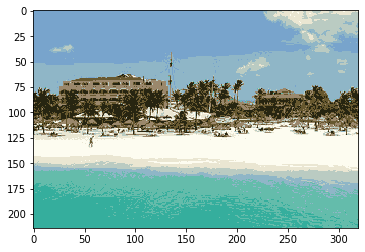

('Number of iterations: 30. Time until convergence: 0.82 seconds',
 array([2, 2, 2, ..., 9, 9, 9]),
 array([[143.56497329, 182.86280902, 199.41601014],
        [ 39.60153748,  37.67179159,  17.59427717],
        [120.39699467, 164.73687187, 204.89618678],
        [186.92439791, 203.77026178, 194.60544503],
        [103.14247963,  88.08676503,  47.40960141],
        [ 53.8855339 , 174.43659072, 157.98023607],
        [155.3518765 , 136.03673143, 108.54138941],
        [234.56830031, 230.99165798, 210.52554745],
        [253.80054041, 252.88835667, 240.40813068],
        [100.75954721, 188.93680806, 171.49881826]]))

In [202]:
image = Image.open('HW1_Data/beach.bmp')
image = np.array(image)

k_means_main(image, 10, True)

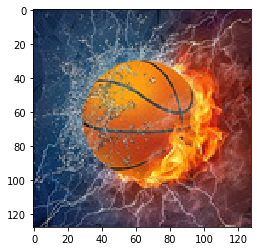

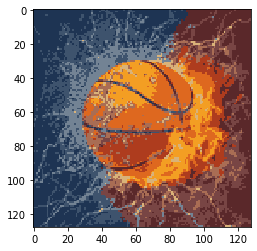

('Number of iterations: 60. Time until convergence: 0.42 seconds',
 array([8, 8, 8, ..., 1, 1, 1]),
 array([[222.88024691, 104.83209877,  31.59938272],
        [ 90.52276786,  40.21651786,  42.38258929],
        [115.49164678, 131.01034208, 148.51710422],
        [174.06941082,  60.677159  ,  30.69572236],
        [120.62749878,  69.07069722,  68.94149196],
        [217.61538462, 178.53050398, 121.93633952],
        [ 62.38584154,  83.31833099, 109.38068448],
        [243.27348993, 158.69630872,  35.19966443],
        [ 30.16458933,  52.17865133,  83.4506232 ],
        [169.13612565, 109.90488656,  84.72774869]]))

In [8]:
image = Image.open('HW1_Data/basketball.jpg')
image = np.array(image)

k_means_main(image, 10, True)

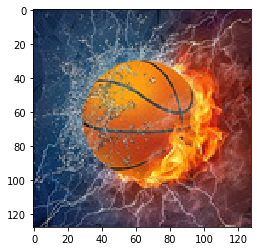

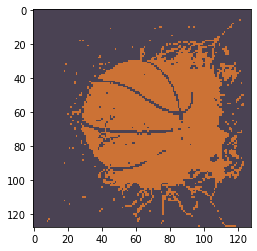

'Number of iterations: 15. Time until convergence: 0.15 seconds'

In [9]:
k_means_main(image, 2)

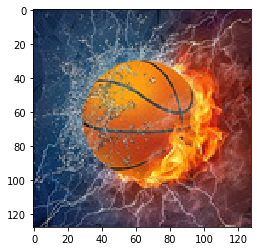

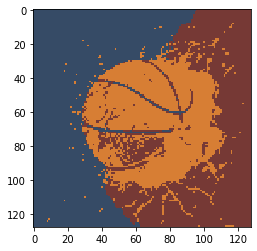

'Number of iterations: 19. Time until convergence: 0.17 seconds'

In [10]:
k_means_main(image, 3)

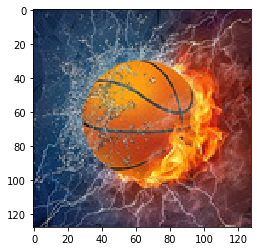

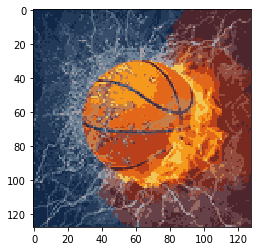

'Number of iterations: 94. Time until convergence: 0.97 seconds'

In [11]:
k_means_main(image, 16)

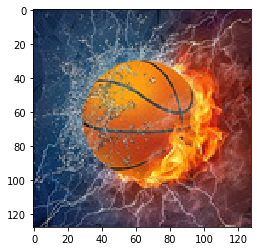

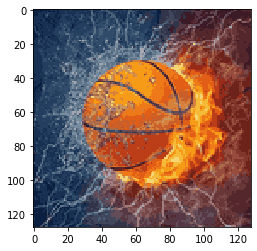

'Number of iterations: 111. Time until convergence: 4.93 seconds'

In [12]:
k_means_main(image, 32)

# K-medoids

In [57]:
import numpy as np
from PIL import Image
import time
from scipy.spatial import distance
import matplotlib.pyplot as plt
from numpy.random import choice
import numpy.matlib

In [ ]:
def k_medoids(vector,initial_medoids):
    m = len(vector[0])
    k = np.size(initial_medoids,0)
    
    medoids = initial_medoids
    previous_medoids = np.zeros(medoids.shape)
    labels = np.zeros((m,1))
    
    iterations = 0
    error = np.linalg.norm(medoids - previous_medoids, 2)

    while (error !=0):
        labels = closest_medoids(vector, medoids, k)
        centroids = update_medoids(vector, labels, k , medoids)
        error = np.linalg.norm(medoids - previous_medoids, 2)
        previous_medoids = medoids
        iterations += 1
        
    return medoids, labels, iterations

In [ ]:
def closest_medoids(X, c, K):
    m, n = X.shape
    idx = np.zeros((m,1))
    arr = np.empty((m,1))
    
    for i in range(0,K):
        a = distance.cdist(X.reshape(-1,3),c[i].reshape(-1,3), 'cityblock')
        arr = np.append(arr, a, axis=1)
        
    arr = np.delete(arr,0,axis=1)
    labels = np.argmin(arr, axis=1)
    
    return labels

In [167]:
def update_medoids(X, labels, K, medoids):
    
    new_medoids = medoids

    for i in set(labels):
        uniq, count = np.unique(X, return_counts = True)
        
        diff_dist = dist(X[uniq], medoids[i], K)
        diff = np.sum((diff_dist.T * count).T)
        
        cluster_points = X[labels == i]
        
        #for j in cluster_points[np.unique(cluster_points)]:
        for j in np.unique(cluster_points, axis = 0):
            new_diff_dist = dist(X[uniq], j, K)
            new_diff = np.sum((new_diff_dist.T * count).T)
            if new_diff < diff :
                diff = new_diff
                new_medoids[i] = j
                        
    return new_medoids           

In [168]:
def dist(X, c, K):
    m = len(X)

    #reshape to 2D array
    if len(c.shape) == 1: 
        c = c.reshape((1,len(c)))
    k = len(c)
    
    arr = np.empty((m, k))
    
    for i in range(m):
        a = distance.cdist(X[i].reshape(-1,3),c.reshape(-1,3), 'cityblock')
        arr[i, :] = a
        
    return arr

In [ ]:
def k_medoids_main(image, K, ret = False):
    
    plt.imshow(image) 
    plt.show()
    
    start_time = time.time()

    #flatten to 2D matrix
    X = image.reshape((-1,3))
    
    #initialize centroids
    samples = choice(len(X), size=K, replace=False)
    init_medoids = X[samples, :]

    #k-medoids
    medoids,idx,iterations = k_medoids(X,init_medoids)

    #assigning each pixel to its corresponding centroid. 
    X_recovered = medoids[idx]
    #getting back the 3d matrix
    X_recovered = X_recovered.reshape((image.shape))

    #plot the new image
    plt.imshow(X_recovered.astype(np.uint8)) 
    plt.show()
    
    if ret == True:
        return 'Number of iterations: {}. Time until convergence: {} seconds'.format(
            iterations, round((time.time() - start_time), 2)),idx, medoids
    else: 
        return 'Number of iterations: {}. Time until convergence: {} seconds'.format(
            iterations, round((time.time() - start_time), 2))

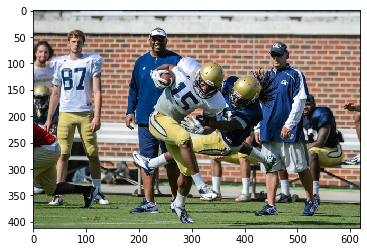

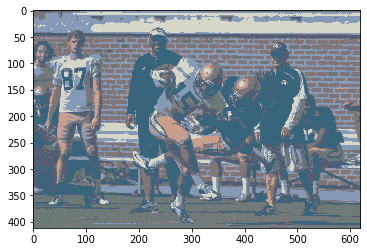

('Number of iterations: 2. Time until convergence: 763.8 seconds',
 array([3, 3, 3, ..., 6, 6, 5]),
 array([[106, 115, 122],
        [129, 117, 119],
        [133, 154, 183],
        [ 83,  94, 116],
        [106, 117, 119],
        [108, 123, 120],
        [114, 122, 125],
        [ 56, 101, 124],
        [214, 215, 201],
        [201, 158, 139]], dtype=uint8))

In [196]:
image = Image.open('HW1_Data/football.bmp')
image = np.array(image)
k_medoids_main(image, 10, True)

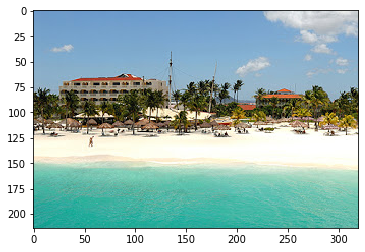

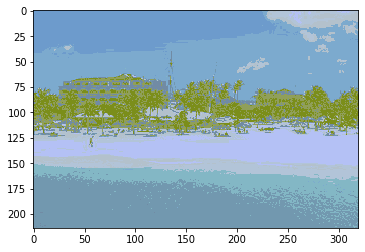

('Number of iterations: 2. Time until convergence: 209.77 seconds',
 array([8, 8, 8, ..., 7, 7, 7]),
 array([[123, 142,  26],
        [113, 139, 164],
        [179, 193, 204],
        [131, 183, 197],
        [144, 159,  90],
        [180, 193, 245],
        [178, 196, 216],
        [114, 152, 175],
        [109, 155, 204],
        [124, 170, 206]], dtype=uint8))

In [198]:
image = Image.open('HW1_Data/beach.bmp')
image = np.array(image)
k_medoids_main(image, 10, True)

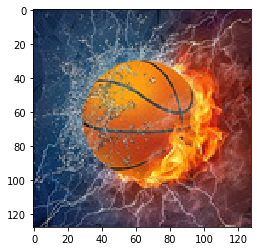

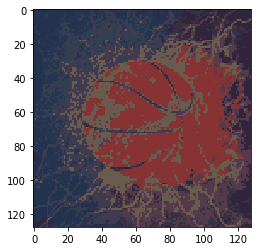

('Number of iterations: 2. Time until convergence: 98.05 seconds',
 array([7, 7, 7, ..., 2, 2, 2]),
 array([[ 56,  49,  67],
        [ 38,  54,  80],
        [ 49,  37,  59],
        [ 48,  64,  80],
        [ 40,  47,  76],
        [ 85,  58,  75],
        [105,  91,  78],
        [ 35,  50,  79],
        [ 64,  59,  81],
        [135,  51,  51]], dtype=uint8))

In [199]:
image = Image.open('HW1_Data/basketball.jpg')
image = np.array(image)
k_medoids_main(image, 10, True)

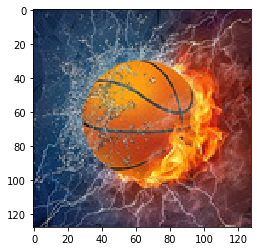

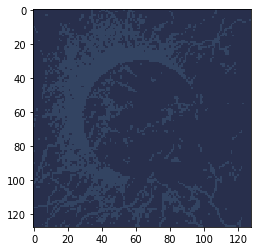

'Number of iterations: 2. Time until convergence: 115.12 seconds'

In [175]:
k_medoids_main(image, 2)

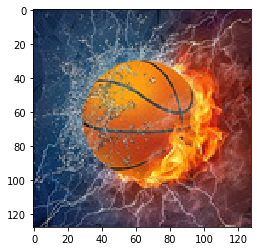

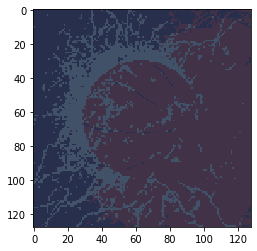

'Number of iterations: 2. Time until convergence: 119.42 seconds'

In [174]:
k_medoids_main(image, 3)

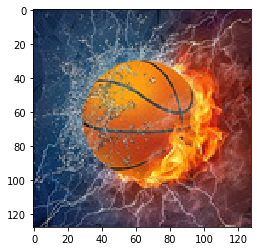

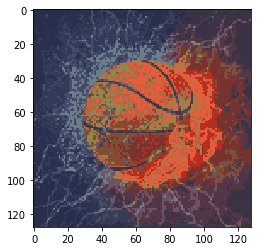

'Number of iterations: 2. Time until convergence: 119.57 seconds'

In [171]:
k_medoids_main(image, 16)

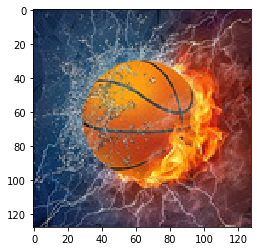

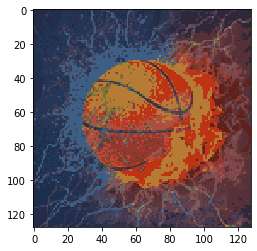

'Number of iterations: 2. Time until convergence: 118.55 seconds'

In [169]:
k_medoids_main(image, 32)

### Bad medoid initialization

In [ ]:
def k_medoids_main_bad(image, K, ret = False):
    
    plt.imshow(image) 
    plt.show()
    
    start_time = time.time()

    #flatten to 2D matrix
    X = image.reshape((-1,3))
    
    #initialize centroids
    #samples = choice(len(X), size=K, replace=False)
    init_medoids = X[0:K-1, :]

    #k-medoids
    medoids,idx,iterations = k_medoids(X,init_medoids)

    #assigning each pixel to its corresponding centroid. 
    X_recovered = medoids[idx]
    #getting back the 3d matrix
    X_recovered = X_recovered.reshape((image.shape))

    #plot the new image
    plt.imshow(X_recovered.astype(np.uint8)) 
    plt.show()
    
    if ret == True:
        return 'Number of iterations: {}. Time until convergence: {} seconds'.format(
            iterations, round((time.time() - start_time), 2)),idx, medoids
    else: 
        return 'Number of iterations: {}. Time until convergence: {} seconds'.format(
            iterations, round((time.time() - start_time), 2))

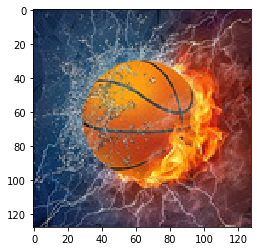

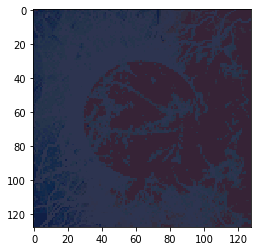

('Number of iterations: 2. Time until convergence: 98.62 seconds',
 array([0, 1, 2, ..., 2, 2, 2]),
 array([[50, 46, 63],
        [34, 40, 74],
        [54, 35, 54],
        [16, 31, 70],
        [12, 40, 77],
        [26, 36, 71],
        [21, 36, 77],
        [32, 44, 66],
        [43, 49, 73],
        [28, 44, 70],
        [27, 44, 72],
        [27, 40, 72],
        [20, 39, 71],
        [20, 44, 72],
        [19, 42, 76],
        [27, 44, 74],
        [38, 45, 74],
        [32, 45, 80],
        [38, 53, 76],
        [45, 52, 80],
        [37, 41, 76],
        [37, 42, 74],
        [44, 50, 74],
        [34, 50, 75],
        [28, 46, 70],
        [28, 48, 75],
        [42, 49, 78],
        [36, 43, 72],
        [40, 47, 75],
        [47, 51, 76],
        [32, 47, 76]], dtype=uint8))

In [200]:
k_medoids_main_bad(image, 32, True)

### Cosine Distance

In [180]:
def k_medoids_main_cos(image, K, ret = False):
    
    plt.imshow(image) 
    plt.show()
    
    start_time = time.time()

    #flatten to 2D matrix
    X = image.reshape((-1,3))
    
    #initialize centroids
    samples = choice(len(X), size=K, replace=False)
    init_medoids = X[samples, :]

    #k-medoids
    medoids,idx,iterations = k_medoids_cos(X,init_medoids)

    #assigning each pixel to its corresponding centroid. 
    X_recovered = medoids[idx]
    #getting back the 3d matrix
    X_recovered = X_recovered.reshape((image.shape))

    #plot the new image
    plt.imshow(X_recovered.astype(np.uint8)) 
    plt.show()
    
    if ret == True:
        return 'Number of iterations: {}. Time until convergence: {} seconds'.format(
            iterations, round((time.time() - start_time), 2)),idx, centroids
    else: 
        return 'Number of iterations: {}. Time until convergence: {} seconds'.format(
            iterations, round((time.time() - start_time), 2))

In [181]:
def k_medoids_cos(vector,initial_medoids):
    m = len(vector[0])
    k = np.size(initial_medoids,0)
    
    medoids = initial_medoids
    previous_medoids = np.zeros(medoids.shape)
    labels = np.zeros((m,1))
    
    iterations = 0
    error = np.linalg.norm(medoids - previous_medoids, 2)

    while (error !=0):
        labels = closest_medoids_cos(vector, medoids, k)
        centroids = update_medoids_cos(vector, labels, k , medoids)
        error = np.linalg.norm(medoids - previous_medoids, 2)
        previous_medoids = medoids
        iterations += 1
        
    return medoids, labels, iterations

In [182]:
def dist_cos(X, c, K):
    m = len(X)

    #reshape to 2D array
    if len(c.shape) == 1: 
        c = c.reshape((1,len(c)))
    k = len(c)
    
    arr = np.empty((m, k))
    
    for i in range(m):
        a = distance.cdist(X[i].reshape(-1,3),c.reshape(-1,3), 'cosine')
        arr[i, :] = a
        
    return arr

In [183]:
def closest_medoids_cos(X, c, K):
    m, n = X.shape
    idx = np.zeros((m,1))
    arr = np.empty((m,1))
    
    for i in range(0,K):
        a = distance.cdist(X.reshape(-1,3),c[i].reshape(-1,3), 'cosine')
        arr = np.append(arr, a, axis=1)
        
    arr = np.delete(arr,0,axis=1)
    labels = np.argmin(arr, axis=1)
    
    return labels

In [189]:
def update_medoids_cos(X, labels, K, medoids):
    
    new_medoids = medoids

    for i in set(labels):
        uniq, count = np.unique(X, return_counts = True)
        
        diff_dist = dist_cos(X[uniq], medoids[i], K)
        diff = np.sum((diff_dist.T * count).T)
        
        cluster_points = X[labels == i]
        
        for j in np.unique(cluster_points, axis = 0):
            new_diff_dist = dist_cos(X[uniq], j, K)
            new_diff = np.sum((new_diff_dist.T * count).T)
            if new_diff < diff :
                diff = new_diff
                new_medoids[i] = j
                        
    return new_medoids           

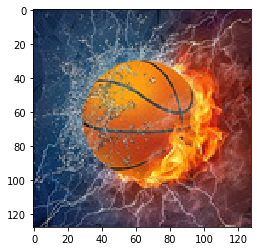

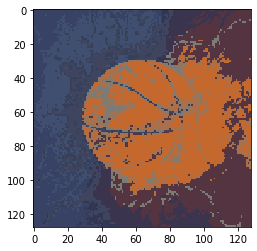

'Number of iterations: 2. Time until convergence: 105.0 seconds'

In [190]:
image = Image.open('HW1_Data/basketball.jpg')
image = np.array(image)
k_medoids_main_cos(image, 10)

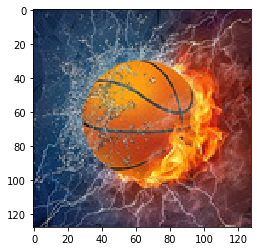

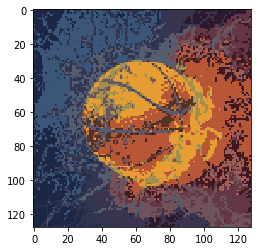

'Number of iterations: 2. Time until convergence: 103.84 seconds'

In [191]:
k_medoids_main_cos(image, 16)

#### Resources: 
https://mubaris.com/posts/kmeans-clustering/

https://towardsdatascience.com/k-medoids-clustering-on-iris-data-set-1931bf781e05

https://github.com/Adioosin/image-compression-using-k-mean/blob/master/Image%20compression%20using%20K-Mean%20algorithm.ipynb
